In [9]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = layers.add([X, X_shortcut])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X

In [15]:
np.random.seed(1)  
  
# 创建随机输入数据  
X = np.random.randn(3, 4, 4, 6)  
  
# 直接使用 Python 变量作为输入，不再需要占位符  
A_prev = tf.constant(X)  
  
# 调用 identity_block 函数，假设它返回的是一个 TensorFlow tensor  
A = identity_block(A_prev, f=2, filters=[2, 4, 6], stage=1, block='a')  
  
# TensorFlow 2.0 不再需要显式初始化变量，因为变量会在第一次使用时自动初始化  
  
# 由于 TensorFlow 2.0 默认启用了即时执行，你可以直接获取张量的值  
out = A.numpy()  
  
# 打印输出  
print("out = " + str(out[1][1][0]))

out = [0.        0.        1.3454674 2.031818  0.        1.3246754]


ori number of training examples = (1080, 64, 64, 3)
ori number of test examples = (1, 1080)
ori number of training examples = (120, 64, 64, 3)
ori number of test examples = (1, 120)
ori classes shape: (6,)
number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)
hand: [0. 0. 0. 0. 0. 1.]


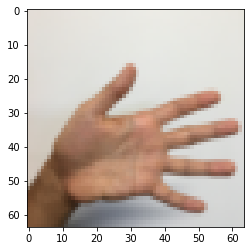

In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

print ("ori number of training examples = " + str(X_train_orig.shape))
print ("ori number of test examples = " + str(Y_train_orig.shape))
print ("ori number of training examples = " + str(X_test_orig.shape))
print ("ori number of test examples = " + str(Y_test_orig.shape))
print ("ori classes shape: " + str(classes.shape))


# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

plt.imshow(X_train[0])
print("hand: "+str(Y_train[0]))

In [18]:
label = np.array([1,2])
L = label.reshape(-1)
C = np.eye(6)

print(label)
print(L.shape)
print(C.shape)
print(C)
print(C[L].T)

[1 2]
(2,)
(6, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


hand: [0. 0. 0. 0. 0. 1.]
hand: [5 0 2 ... 2 4 5]
hand: [0. 0. 0. 0. 0. 1.]
hand: [0 0 0 5 1 0 3 1 5 1 5 1 3 1 1 3 5 4 0 4 5 4 2 5 3 5 4 2 1 2 3 1 0 3 1 1 0
 4 2 3 0 3 0 2 3 1 2 2 0 3 4 1 2 0 4 0 4 0 4 4 5 5 2 4 4 5 0 1 3 5 0 4 1 2
 3 4 3 5 1 5 2 0 1 4 2 4 4 1 4 5 5 0 0 5 5 5 3 3 5 2 2 2 0 2 5 3 0 2 3 4 1
 3 2 4 2 2 1 3 1 3]


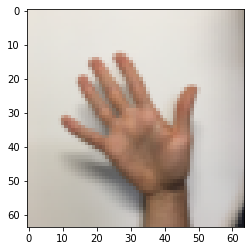

In [29]:
plt.imshow(X_train[3])
print("hand: "+str(Y_train[3]))
print("hand: "+str(Y_train_orig[0]))

plt.imshow(X_test[3])
print("hand: "+str(Y_test[3]))
print("hand: "+str(Y_test_orig[0]))

#描述
太深的网络训练起来很困难，因为会有梯度消失和梯度爆炸的问题。
有一种解决办法就是：skip connection（跳跃连接），它可以将某一层的激活直接传递给更深的一层，利用这个思想可以训练很深的网络，也就是ResNet（残差网络）
ResNet是一种应用了名为 Residual block（残差结构）的网络，作者何恺明

我们来简单描述一下网络的正向执行顺序
...conv(i次卷积)->relu(i次激活)->conv(i+1次卷积)->relu(i+1次激活)...

那么这个skip connection执行的操作就是
在relu(m次激活)后的值，在执行conv(m+1次卷积)的同时，直接传递到更深的层数（n>m），conv(n次卷积)计算后的值一起，再进行relu（n次激活）

唯一要记住的就是，跳跃连接的起始点发生位置：
-起点在激活后，终点在激活前

Residual block的部分是怎么构成的，如果用一个小框，框住网络之中发生一次skip connection的所有层，就成为了一个Residual block（残差块）。残差块的网络输入是上一次relu之后的值，残差块的网络输出是执行过skip connection并relu之后的值。


把很多个Residual block堆叠在一起就成为了ResNet。

残差网络的优势：
理论上随着网络加深，网络表现在训练数据上应该持续变好。但在实际训练中，一个普通的网络（plain network）会使网络训练变得很困难，导致训练误差在网络深度加深后反而下降。应用了ResNet有助于解决梯度消失与爆炸，可以让网络在加深层数的同时训练误差持续下降。

控制好网络的深度是网络在训练集上表现出色的前提条件

#为什么使用残差网络

a[l+2] = g(z[l+2]+a[l]) = g(w[l+2]a[l+1]+b[l+2]+a[l])
如果我们这里使用远离K的正则化,当参数w_j接近K时，正则化项的值会很大，从而在优化过程中受到更大的惩罚。
$2λ \sum_j (w_j−K)^2$

如果假设w[l+2]和b[l+2]都是0(也就是对权重和偏置都做了L2正则化，进行防止数值过大的惩罚)，并且激活函数是relu，那么
a[l+2]=g（a[l]）= a[l]

可以看出：残差块比较容易学习恒等函数
网络加入残差块，并不会非常影响网络的表现。那如果这个残差块能学到有用的特征，就会比学习恒等函数更好。
当不含残差块的网络深度很深时，学习恒等函数也会变得困难，有很多层数反而让网络效果变差

ng认为残差网络有效的原因是：学习恒等函数很容易，基本不会影响总体表现，幸运的话还能提示网络表现。

当z[l+2]与a[l]尺寸不同时，需要在skip connection中加入一个权重矩阵。公式变为
a[l+2] = g(w[l+2]a[l+1]+b[l+2]+W_s* a[l])


In [25]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform

# X_input 输入
# filters_num 卷积核个数
# 卷积核大小为（1，1）,步长为1
# 经过一个identity_block，图像尺寸不会改变，深度变为滤波器个数
def identity_block_chen(X_input, filter_size, filters_num, stage_name, block_name):
    conv_name_base = 'ResNet' + str(stage_name) + block_name + '_branch'
    bn_name_base = 'batchnormalize' + str(stage_name) + block_name + '_branch'
    
    # 三层卷积各自的卷积核数
    F1_num, F2_num, F3_num = filters_num
    
    # 保存输入作为skip connection
    X_shortcut = X_input 
    
    # 第一个组成
    # 卷积核大小使用（1，1），并用padding=‘valid’不进行任何填充
    X = X_input
    X = Conv2D(filters = F1_num, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # 第二个组成
    # 卷积核大小使用输入参数，并用padding=‘same’保证输入输出图像尺寸不变
    X = Conv2D(filters = F2_num, kernel_size = (filter_size, filter_size), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # 第三个组成（可以发现没有relu）
    X = Conv2D(filters = F3_num, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2c')(X)

    # skip connection
    X = layers.add([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X




In [29]:
def convolutional_block_chen(X_input, filter_size, filters_num, stage_name, block_name, stride = 2):
    # defining name basis
    conv_name_base = 'res' + str(stage_name) + block_name + '_branch'
    bn_name_base = 'bn' + str(stage_name) + block_name + '_branch'
    
    # 三层卷积各自的卷积核数
    F1_num, F2_num, F3_num = filters_num
    
    # 保存输入作为skip connection
    X_shortcut = X_input 
    
    # 第一个组成：会减小尺寸
    X = X_input
    X = Conv2D(F1_num, (1, 1), strides = (stride, stride), name = conv_name_base + '2a', padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # 第二个组成：尺寸不变
    # 卷积核大小使用输入参数，并用padding=‘same’保证输入输出图像尺寸不变
    X = Conv2D(F2_num, (filter_size, filter_size), strides = (1, 1), name = conv_name_base + '2b', padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # 第三个组成（可以发现没有relu）：尺寸不变
    X = Conv2D(F3_num, (1, 1), strides = (1, 1), name = conv_name_base + '2c', padding ='valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # skip connection保持尺寸一致
    X_shortcut = Conv2D(F3_num, (1, 1), strides = (stride, stride), name = conv_name_base + '1', padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # skip connection
    X = layers.add([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [38]:
import tensorflow as tf
import keras.backend as K

tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    np.random.seed(1)
    A_prev = tf.compat.v1.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = identity_block_chen(A_prev, filter_size = 2, filters_num = [2, 4, 6], stage_name = 1, block_name = 'a')
    test.run(tf.compat.v1.global_variables_initializer() )
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [0.        0.        1.3454674 2.031818  0.        1.3246754]


In [39]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as test:
    np.random.seed(1)
    A_prev = tf.compat.v1.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = convolutional_block_chen(A_prev, filter_size = 2, filters_num = [2, 4, 6], stage_name = 1, block_name = 'a')
    test.run(tf.compat.v1.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))


out = [0.         0.         0.         0.8929657  0.         0.19882731]


In [40]:
def ResNet_50(input_shape = (64, 64, 3), classes = 6):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)
    
    # stage 1
    X = Conv2D(64, (7,7), (2,2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    # stage 2
    X = convolutional_block_chen(X, filter_size = 3, filters_num = [64, 64, 256], stage_name = 2, block_name='a', stride = 1)
    X = identity_block_chen(X, 3, [64, 64, 256], stage_name = 2, block_name = 'b')
    X = identity_block_chen(X, 3, [64, 64, 256], stage_name = 2, block_name = 'c')
    
    # stage 3
    X = convolutional_block_chen(X, filter_size = 3, filters_num = [128, 128, 512], stage_name = 3, block_name='a', stride = 2)
    X = identity_block_chen(X, 3, [128, 128, 512], stage_name = 3, block_name = 'b')
    X = identity_block_chen(X, 3, [128, 128, 512], stage_name = 3, block_name = 'c')
    X = identity_block_chen(X, 3, [128, 128, 512], stage_name = 3, block_name = 'd')
    
    # stage 4
    X = convolutional_block_chen(X, filter_size = 3, filters_num = [256, 256, 1024], stage_name = 4, block_name='a', stride = 2)
    X = identity_block_chen(X, 3, [256, 256, 1024], stage_name = 4, block_name = 'b')
    X = identity_block_chen(X, 3, [256, 256, 1024], stage_name = 4, block_name = 'c')
    X = identity_block_chen(X, 3, [256, 256, 1024], stage_name = 4, block_name = 'd')
    X = identity_block_chen(X, 3, [256, 256, 1024], stage_name = 4, block_name = 'e')
    X = identity_block_chen(X, 3, [256, 256, 1024], stage_name = 4, block_name = 'f')
    
    # stage 5
    X = convolutional_block_chen(X, filter_size = 3, filters_num = [512, 512, 2048], stage_name = 5, block_name='a', stride = 2)
    X = identity_block_chen(X, filter_size = 3, filters_num=[256, 256, 2048], stage_name=5, block_name='b')
    X = identity_block_chen(X, filter_size = 3, filters_num=[256, 256, 2048], stage_name=5, block_name='c')
    
    X = AveragePooling2D(pool_size=(2,2))(X)
    
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model
    
    
model = ResNet_50(input_shape = (64, 64, 3), classes = 6)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
34/34 [==============================] - 25s 435ms/step - loss: 1.9015 - accuracy: 0.4926
Epoch 2/20
34/34 [==============================] - 15s 430ms/step - loss: 0.7540 - accuracy: 0.7944
Epoch 3/20
34/34 [==============================] - 15s 427ms/step - loss: 1.0647 - accuracy: 0.6778
Epoch 4/20
34/34 [==============================] - 15s 439ms/step - loss: 0.5306 - accuracy: 0.8491
Epoch 5/20
34/34 [==============================] - 14s 425ms/step - loss: 0.3683 - accuracy: 0.8815
Epoch 6/20
34/34 [==============================] - 15s 427ms/step - loss: 0.2789 - accuracy: 0.9231
Epoch 7/20
34/34 [==============================] - 15s 440ms/step - loss: 0.4182 - accuracy: 0.8815
Epoch 8/20
34/34 [==============================] - 16s 457ms/step - loss: 0.1214 - accuracy: 0.9565
Epoch 9/20
34/34 [==============================] - 14s 418ms/step - loss: 0.0932 - accuracy: 0.9722
Epoch 10/20
34/34 [==============================] - 14s 419ms/step - loss: 0.0403 - accura

In [21]:


preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))



4/4 [==============================] - 0s 65ms/step - loss: 1.5141 - accuracy: 0.7083
Loss = 1.5141490697860718
Test Accuracy = 0.7083333134651184


Input image shape: (1, 64, 64, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 
1/1 [==============================] - 1s 838ms/step
[[1. 0. 0. 0. 0. 0.]]


InvalidArgumentError: Graph execution error:

Detected at node ResNet50/zero_padding2d_1/Pad defined at (most recent call last):
  File "/home/yihang/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/home/yihang/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start

  File "/home/yihang/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/home/yihang/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/home/yihang/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code

  File "/tmp/ipykernel_448183/321597399.py", line 20, in <cell line: 20>

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 2655, in predict

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/layers/reshaping/zero_padding2d.py", line 149, in call

  File "/home/yihang/anaconda3/lib/python3.9/site-packages/keras/src/backend.py", line 4039, in spatial_2d_padding

The first dimension of paddings must be the rank of inputs[4,2] [32,64,3]
	 [[{{node ResNet50/zero_padding2d_1/Pad}}]] [Op:__inference_predict_function_205723]

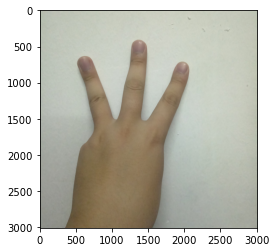

In [30]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.image as mpimg  

img_path = 'images/fingers_big/3.jpg'
# img = image.load_img(img_path)  # 原尺寸读取
img = image.load_img(img_path, target_size=(64, 64))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

my_image = mpimg.imread(img_path)
plt.imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
print(model.predict(x))


4/4 [==============================] - 1s 61ms/step - loss: 0.7963 - accuracy: 0.8833
Loss = 0.7962857484817505
Test Accuracy = 0.8833333253860474
Input image shape: (1, 64, 64, 3)
1/1 [==============================] - 1s 551ms/step
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
(1, 64, 64, 3)
1/1 [==============================] - 1s 550ms/step
[[6.7244207e-07 9.9999523e-01 1.7753597e-06 4.6666621e-08 2.2821955e-06
  2.1434590e-09]]


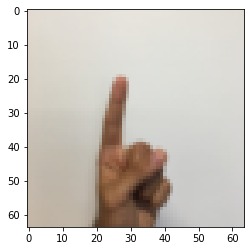

In [36]:
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.image as mpimg  
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = load_model('ResNet_model_45_epochs.h5') #这里要读模型，我们可以先沿用老的模型
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

img_path = 'images/fingers_big/1.jpg'
# img = image.load_img(img_path)  # 原尺寸读取
img = image.load_img(img_path, target_size=(64, 64))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

img_path_2 = 'images/fingers_big/2.jpg'
img_2 = image.load_img(img_path_2, target_size=(64, 64))
x_2= image.img_to_array(img_2)
x_2= np.expand_dims(x_2, axis=0)
x_2= preprocess_input(x_2)

img_path_3 = 'images/fingers_big/3.jpg'
img_3 = image.load_img(img_path_3, target_size=(64, 64))
x_3= image.img_to_array(img_3)
x_3= np.expand_dims(x_3, axis=0)
x_3= preprocess_input(x_3)

img_path_4 = 'images/fingers_big/4.jpg'
img_4 = image.load_img(img_path_4, target_size=(64, 64))
x_4= image.img_to_array(img_4)
x_4= np.expand_dims(x_4, axis=0)
x_4= preprocess_input(x_4)

img_path_5 = 'images/fingers_big/5.jpg'
img_5 = image.load_img(img_path_5, target_size=(64, 64))
x_5= image.img_to_array(img_5)
x_5= np.expand_dims(x_5, axis=0)
x_5= preprocess_input(x_5)

concatenated_tensor = tf.concat([x, x_2, x_3, x_4, x_5], axis=0)
print(model.predict([concatenated_tensor]))

# my_image = mpimg.imread(img_path)
# plt.imshow(my_image)
# print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
# print(model.predict(x))

(1, 64, 64, 3)
1/1 [==============================] - 0s 20ms/step
预测概率:[[1. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 19ms/step
预测类别:0


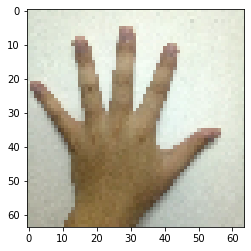

In [73]:
img_path_5 = 'images/fingers_big/6.jpg'
img_5 = image.load_img(img_path_5, target_size=(64, 64))
x_5 = image.img_to_array(img_5)
x_5 = ( x_5 / x_5.max() * 255).astype(np.uint8)
plt.imshow(x_5)
x_5 = x_5.reshape([1, 64, 64, 3])
print(x_5.shape)

print("预测概率:" + str(model.predict(x_5)))
  
max_index = np.argmax(model.predict(x_5))  
print("预测类别:" + str(max_index))


# plt.imshow(x_5)

(1, 64, 64, 3)
1/1 [==============================] - 0s 19ms/step
预测概率:[[2.3864331e-09 4.3267150e-09 1.4335745e-10 5.7487867e-08 9.9999428e-01
  5.5467904e-06]]
1/1 [==============================] - 0s 20ms/step
预测类别:4


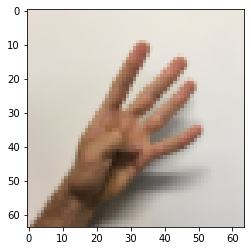

In [69]:

number_id = 17
testImage = X_test[number_id].reshape([1, 64, 64, 3])
print(testImage.shape)
print("预测概率:" + str(model.predict(testImage)))
  
max_index = np.argmax(model.predict(testImage))  
print("预测类别:" + str(max_index))

plt.imshow(X_test[number_id])

In [57]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)            0         ['input_10[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 32, 32, 64)           9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1[0][0]']        

                                                                                                  
 batchnormalize2c_branch2b   (None, 15, 15, 64)           256       ['ResNet2c_branch2b[0][0]']   
 (BatchNormalization)                                                                             
                                                                                                  
 activation_11 (Activation)  (None, 15, 15, 64)           0         ['batchnormalize2c_branch2b[0]
                                                                    [0]']                         
                                                                                                  
 ResNet2c_branch2c (Conv2D)  (None, 15, 15, 256)          16640     ['activation_11[0][0]']       
                                                                                                  
 batchnormalize2c_branch2c   (None, 15, 15, 256)          1024      ['ResNet2c_branch2c[0][0]']   
 (BatchNor

                                                                                                  
 batchnormalize3c_branch2b   (None, 8, 8, 128)            512       ['ResNet3c_branch2b[0][0]']   
 (BatchNormalization)                                                                             
                                                                                                  
 activation_20 (Activation)  (None, 8, 8, 128)            0         ['batchnormalize3c_branch2b[0]
                                                                    [0]']                         
                                                                                                  
 ResNet3c_branch2c (Conv2D)  (None, 8, 8, 512)            66048     ['activation_20[0][0]']       
                                                                                                  
 batchnormalize3c_branch2c   (None, 8, 8, 512)            2048      ['ResNet3c_branch2c[0][0]']   
 (BatchNor

                                                                                                  
 batchnormalize4b_branch2b   (None, 4, 4, 256)            1024      ['ResNet4b_branch2b[0][0]']   
 (BatchNormalization)                                                                             
                                                                                                  
 activation_29 (Activation)  (None, 4, 4, 256)            0         ['batchnormalize4b_branch2b[0]
                                                                    [0]']                         
                                                                                                  
 ResNet4b_branch2c (Conv2D)  (None, 4, 4, 1024)           263168    ['activation_29[0][0]']       
                                                                                                  
 batchnormalize4b_branch2c   (None, 4, 4, 1024)           4096      ['ResNet4b_branch2c[0][0]']   
 (BatchNor

 (BatchNormalization)                                                                             
                                                                                                  
 activation_38 (Activation)  (None, 4, 4, 256)            0         ['batchnormalize4e_branch2b[0]
                                                                    [0]']                         
                                                                                                  
 ResNet4e_branch2c (Conv2D)  (None, 4, 4, 1024)           263168    ['activation_38[0][0]']       
                                                                                                  
 batchnormalize4e_branch2c   (None, 4, 4, 1024)           4096      ['ResNet4e_branch2c[0][0]']   
 (BatchNormalization)                                                                             
                                                                                                  
 add_12 (A

 (BatchNormalization)                                                                             
                                                                                                  
 activation_47 (Activation)  (None, 2, 2, 256)            0         ['batchnormalize5b_branch2b[0]
                                                                    [0]']                         
                                                                                                  
 ResNet5b_branch2c (Conv2D)  (None, 2, 2, 2048)           526336    ['activation_47[0][0]']       
                                                                                                  
 batchnormalize5b_branch2c   (None, 2, 2, 2048)           8192      ['ResNet5b_branch2c[0][0]']   
 (BatchNormalization)                                                                             
                                                                                                  
 add_15 (A

2024-03-04 14:17:48.332244: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 14:17:48.340941: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


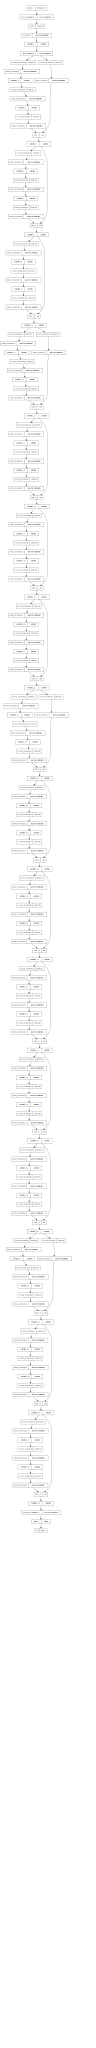

In [3]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot  
import pydot
from keras.models import Model, load_model

model = load_model('ResNet_model_45_epochs.h5') #这里要读模型，我们可以先沿用老的模型

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))